### Notebook sur les données "Champignon" (Gaufreteau Simon / Gassion Axel)

## Chargement des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#import graphviz

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn import metrics
from sklearn import svm
from dtreeviz.trees import dtreeviz
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
print("Load OK")

Load OK


## Chargement des données

In [2]:
dataset=pd.read_csv("./data/data_mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


### Passage de Qualitatif à Quantitatif

In [4]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [5]:
y
# Poisonous = 1 / Eatable = 0

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X.describe()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.000492,0.387986,0.101920,0.003939,0.450025,0.000492,0.314623,0.399311,0.005416,0.184638,...,0.049237,0.153619,0.497292,0.210734,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.022185,0.487321,0.302562,0.062641,0.497527,0.022185,0.464394,0.489787,0.073399,0.388028,...,0.216375,0.360605,0.500023,0.407855,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Entrainement

### Train et test sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

### Fonction de test des classifieurs

In [30]:
# Fonction d'affichage des résultats
def getModelResult(model,model_type,X_train,X_test,Y_train,Y_test,fit=True):
    if(fit):
        model.fit(X_train,Y_train)
    Y_res=model.predict(X_test)
    print("Pour un {model}".format(model=model_type))
    print(confusion_matrix(Y_test,Y_res))
    print("Accuracy = {0:.3f}, Précision = {1:.3f}, F-Mesure = {1:.3f}\n".format(accuracy_score(Y_test,Y_res),precision_score(Y_test,Y_res),f1_score(Y_test,Y_res)))

# Tous les classifiers que nous testons
def classifiers(X_train,X_test,Y_train,Y_test,random_state=1):
    DecTree=DecisionTreeClassifier(criterion="gini", random_state=random_state)
    getModelResult(DecTree,"DecisionTree",X_train,X_test,Y_train,Y_test)

    KN=KNeighborsClassifier(n_neighbors=5)
    getModelResult(KN,"K-Neighbors",X_train,X_test,Y_train,Y_test)

    MLP=MLPClassifier(hidden_layer_sizes=(50,20),random_state=random_state)
    getModelResult(MLP,"MLP",X_train,X_test,Y_train,Y_test)

    RFC = RandomForestClassifier(n_estimators=100,random_state=random_state)
    getModelResult(RFC,"Random Forest",X_train,X_test,Y_train,Y_test)

    SVC = svm.SVC(random_state=random_state)
    getModelResult(SVC,"SVC",X_train,X_test,Y_train,Y_test)


In [31]:
features=list(X.columns)
features

['cap-shape_1',
 'cap-shape_2',
 'cap-shape_3',
 'cap-shape_4',
 'cap-shape_5',
 'cap-surface_1',
 'cap-surface_2',
 'cap-surface_3',
 'cap-color_1',
 'cap-color_2',
 'cap-color_3',
 'cap-color_4',
 'cap-color_5',
 'cap-color_6',
 'cap-color_7',
 'cap-color_8',
 'cap-color_9',
 'bruises_1',
 'odor_1',
 'odor_2',
 'odor_3',
 'odor_4',
 'odor_5',
 'odor_6',
 'odor_7',
 'odor_8',
 'gill-attachment_1',
 'gill-spacing_1',
 'gill-size_1',
 'gill-color_1',
 'gill-color_2',
 'gill-color_3',
 'gill-color_4',
 'gill-color_5',
 'gill-color_6',
 'gill-color_7',
 'gill-color_8',
 'gill-color_9',
 'gill-color_10',
 'gill-color_11',
 'stalk-shape_1',
 'stalk-root_1',
 'stalk-root_2',
 'stalk-root_3',
 'stalk-root_4',
 'stalk-surface-above-ring_1',
 'stalk-surface-above-ring_2',
 'stalk-surface-above-ring_3',
 'stalk-surface-below-ring_1',
 'stalk-surface-below-ring_2',
 'stalk-surface-below-ring_3',
 'stalk-color-above-ring_1',
 'stalk-color-above-ring_2',
 'stalk-color-above-ring_3',
 'stalk-color-a

### Normalisation

In [32]:
SS=StandardScaler()
SS.fit(X_train)
X_train_norm=SS.transform(X_train)
X_test_norm=SS.transform(X_test)

In [33]:
classifiers(X_train_norm,X_test_norm,Y_train,Y_test,random_state=1)

Pour un DecisionTree
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un K-Neighbors
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un MLP
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un Random Forest
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un SVC
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000



### Génération des PCA

In [34]:
acp=PCA(n_components=3)
acp.fit(X_train_norm)

X_train_pca=np.concatenate((X_train_norm,acp.transform(X_train_norm)),axis=1)
X_test_pca=np.concatenate((X_test_norm,acp.transform(X_test_norm)),axis=1)

### Test avec PCA

In [35]:
classifiers(X_train_pca,X_test_pca,Y_train,Y_test,random_state=1)

Pour un DecisionTree
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un K-Neighbors
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un MLP
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un Random Forest
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un SVC
[[2131    0]
 [   2 1929]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000



Note : Overfitting clair, nous avons besoin d'une sélection de variables

### Sélection de variables

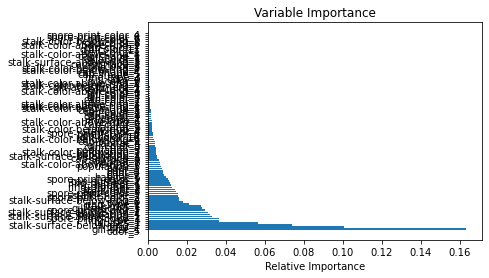

Feature importance (20 premiers) :

odor_5                        0.163398
gill-size_1                   0.100771
odor_2                        0.074153
stalk-surface-below-ring_1    0.056417
bruises_1                     0.036849
ring-type_4                   0.036546
spore-print-color_1           0.032885
stalk-surface-above-ring_1    0.031833
population_4                  0.030713
stalk-surface-above-ring_2    0.029547
spore-print-color_7           0.027798
gill-spacing_1                0.027283
stalk-root_1                  0.021058
ring-type_2                   0.018203
odor_6                        0.016324
stalk-surface-below-ring_2    0.015881
spore-print-color_2           0.015656
stalk-shape_1                 0.015510
spore-print-color_3           0.014608
stalk-root_3                  0.013973
dtype: float64


In [36]:
clf = RandomForestClassifier(n_estimators=100,random_state=1)
clf.fit(X_train_norm, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.array(features)
#print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# Serie with the importances
featimp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature importance (20 premiers) :\n")
print(featimp[:20])


### Récupération des paramètres les plus importants

In [37]:
selected_features=sorted_idx[:5]
selected_features

array([22, 28, 19, 48, 17], dtype=int64)

### Résumé des formats de données

In [38]:
print(X_train.shape)
print(X_train_norm.shape)
print(X_train_pca.shape)
print(X_train_norm[:,selected_features].shape)

(4062, 95)
(4062, 95)
(4062, 98)
(4062, 5)


## Utilisation des classifieurs sur les meilleurs paramètres

In [44]:
classifiers(X_train_norm[:,selected_features],X_test_norm[:,selected_features],Y_train,Y_test,random_state=None)

Pour un DecisionTree
[[2084   47]
 [  51 1880]]
Accuracy = 0.976, Précision = 0.976, F-Mesure = 0.976

Pour un K-Neighbors
[[2084   47]
 [  51 1880]]
Accuracy = 0.976, Précision = 0.976, F-Mesure = 0.976

Pour un MLP
[[2084   47]
 [  51 1880]]
Accuracy = 0.976, Précision = 0.976, F-Mesure = 0.976

Pour un Random Forest
[[2084   47]
 [  51 1880]]
Accuracy = 0.976, Précision = 0.976, F-Mesure = 0.976

Pour un SVC
[[2084   47]
 [  51 1880]]
Accuracy = 0.976, Précision = 0.976, F-Mesure = 0.976



### Sur 20 variables

In [53]:
selected_features=sorted_idx[:20]
selected_features
classifiers(X_train_norm[:,selected_features],X_test_norm[:,selected_features],Y_train,Y_test,random_state=None)

Pour un DecisionTree
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un K-Neighbors
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un MLP
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un Random Forest
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000

Pour un SVC
[[2131    0]
 [   0 1931]]
Accuracy = 1.000, Précision = 1.000, F-Mesure = 1.000



### Utilisation d'un classifieur pour estimer le nombre de paramètres optimal

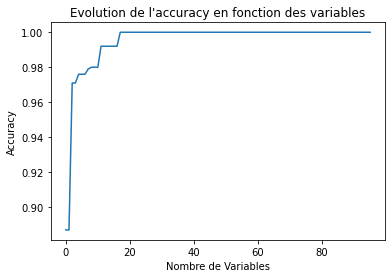

In [25]:
MLP=MLPClassifier(hidden_layer_sizes=(50,20),random_state=1)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
 X1_f = X_train_norm[:,sorted_idx[:f+1]]
 X2_f = X_test_norm[:,sorted_idx[:f+1]]
 MLP.fit(X1_f,Y_train)
 YMLP=MLP.predict(X2_f)
 scores[f]=np.round(accuracy_score(Y_test,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

## Conclusion

Tous les modèles semblent apprendre "parfaitement" avec les paramètres qui leurs sont donnés, c'est à dire qu'ils produisent tous la même classification et probablement celle optimale.
A partir de 18 (meilleurs) paramètres, tous les modèles donnent une accuracy de 100%.

Contrairement à l'étude sur le cancer beaucoup plus complète, il n'est donc pas nécessaire d'effectuer plus d'optimisation ni d'étudier plus grandement les données.